In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
os.makedirs("si_figures", exist_ok=True)
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors

In [2]:
def get_mwt(smiles: str) -> float:
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    else:
        return rdMolDescriptors.CalcExactMolWt(mol)


def get_rings(smiles: str) -> int:
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    else:
        return rdMolDescriptors.CalcNumRings(mol)


def get_logp(smiles: str) -> float:
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    else:
        return rdMolDescriptors.CalcCrippenDescriptors(mol)[0]
    
DPI=512

# Benchmark analyses

## 1. Original data

### 1.1 Protein-peptide binding affinity

Canonical - Removed entries: 804
Non-canonical - Removed entries: 5


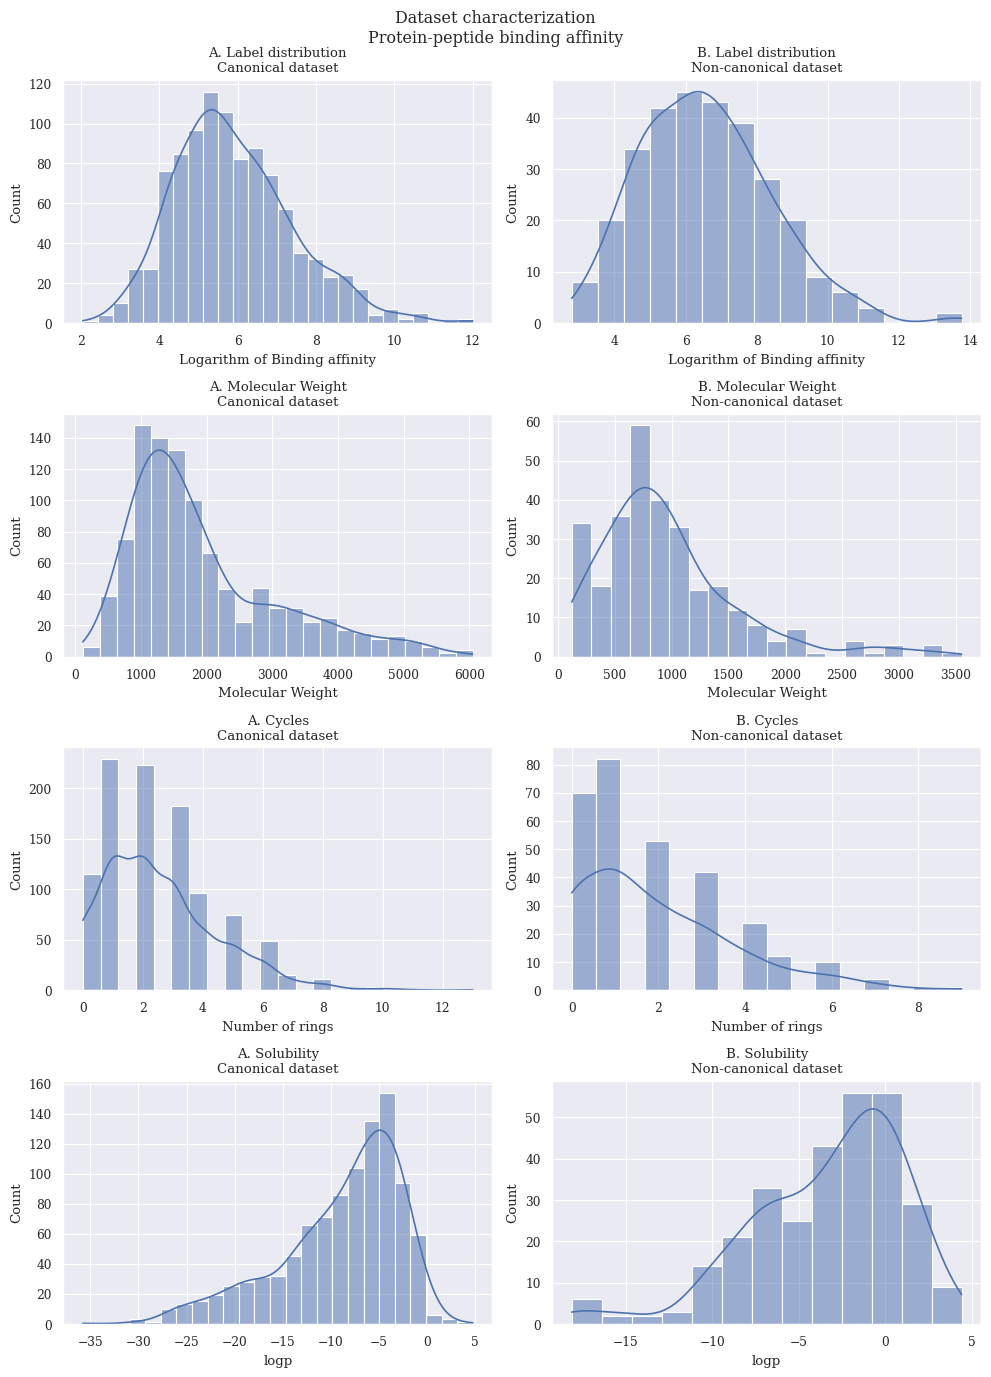

In [3]:
n_properties = 4

df = pd.read_csv('../../original_data/c-binding.csv')
df2 = pd.read_csv('../../original_data/nc-binding.csv')

df3 = pd.read_csv('../../downstream_data/c-binding.csv')
df4 = pd.read_csv('../../downstream_data/nc-binding.csv')

df3['wt'] = df3['SMILES'].map(get_mwt)
df4['wt'] = df4['SMILES'].map(get_mwt)
df3['rings'] = df3['SMILES'].map(get_rings)
df4['rings'] = df4['SMILES'].map(get_rings)
df3['logp'] = df3['SMILES'].map(get_logp)
df4['logp'] = df4['SMILES'].map(get_logp)

print(f"Canonical - Removed entries: {len(df) - len(df3)}")
print(f"Non-canonical - Removed entries: {len(df2) - len(df4)}")

plt.gcf().set_size_inches(10, 3.5*n_properties)
sns.set_theme('paper')
plt.rcParams.update({'font.family': 'serif',
            })
                    #  'mathtext.default': 'regular'})
plt.subplots_adjust(top=0.8)


plt.subplot(n_properties, 2, 1)
sns.histplot(df3, x='labels', kde=True)
plt.xlabel("Logarithm of Binding affinity")
plt.title("A. Label distribution\nCanonical dataset")

plt.subplot(n_properties, 2, 2)
sns.histplot(df4, x='labels', kde=True)
plt.xlabel("Logarithm of Binding affinity")
plt.title("B. Label distribution\nNon-canonical dataset")

plt.subplot(n_properties, 2, 3)
sns.histplot(df3, x='wt', kde=True)
plt.xlabel("Molecular Weight")
plt.title("A. Molecular Weight\nCanonical dataset")

plt.subplot(n_properties, 2, 4)
sns.histplot(df4, x='wt', kde=True)
plt.xlabel("Molecular Weight")
plt.title("B. Molecular Weight\nNon-canonical dataset")

plt.subplot(n_properties, 2, 5)
sns.histplot(df3, x='rings', kde=True)
plt.xlabel("Number of rings")
plt.title("A. Cycles\nCanonical dataset")

plt.subplot(n_properties, 2, 6)
sns.histplot(df4, x='rings', kde=True)
plt.xlabel("Number of rings")
plt.title("B. Cycles\nNon-canonical dataset")

plt.subplot(n_properties, 2, 7)
sns.histplot(df3, x='logp', kde=True)
plt.xlabel("logp")
plt.title("A. Solubility\nCanonical dataset")

plt.subplot(n_properties, 2, 8)
sns.histplot(df4, x='logp', kde=True)
plt.xlabel("logp")
plt.title("B. Solubility\nNon-canonical dataset")

plt.suptitle("Dataset characterization\nProtein-peptide binding affinity")
plt.tight_layout()
plt.savefig('si_figures/binding.png', dpi=DPI, bbox_inches='tight')

/var/folders/11/g_ww0v454tvd_q2jybl8p2180000gn/T/ipykernel_24224/1756926841.py:4: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('../../original_data/nc-cpp.csv')


Canonical - Removed entries: -1
Non-canonical - Removed entries: 6854


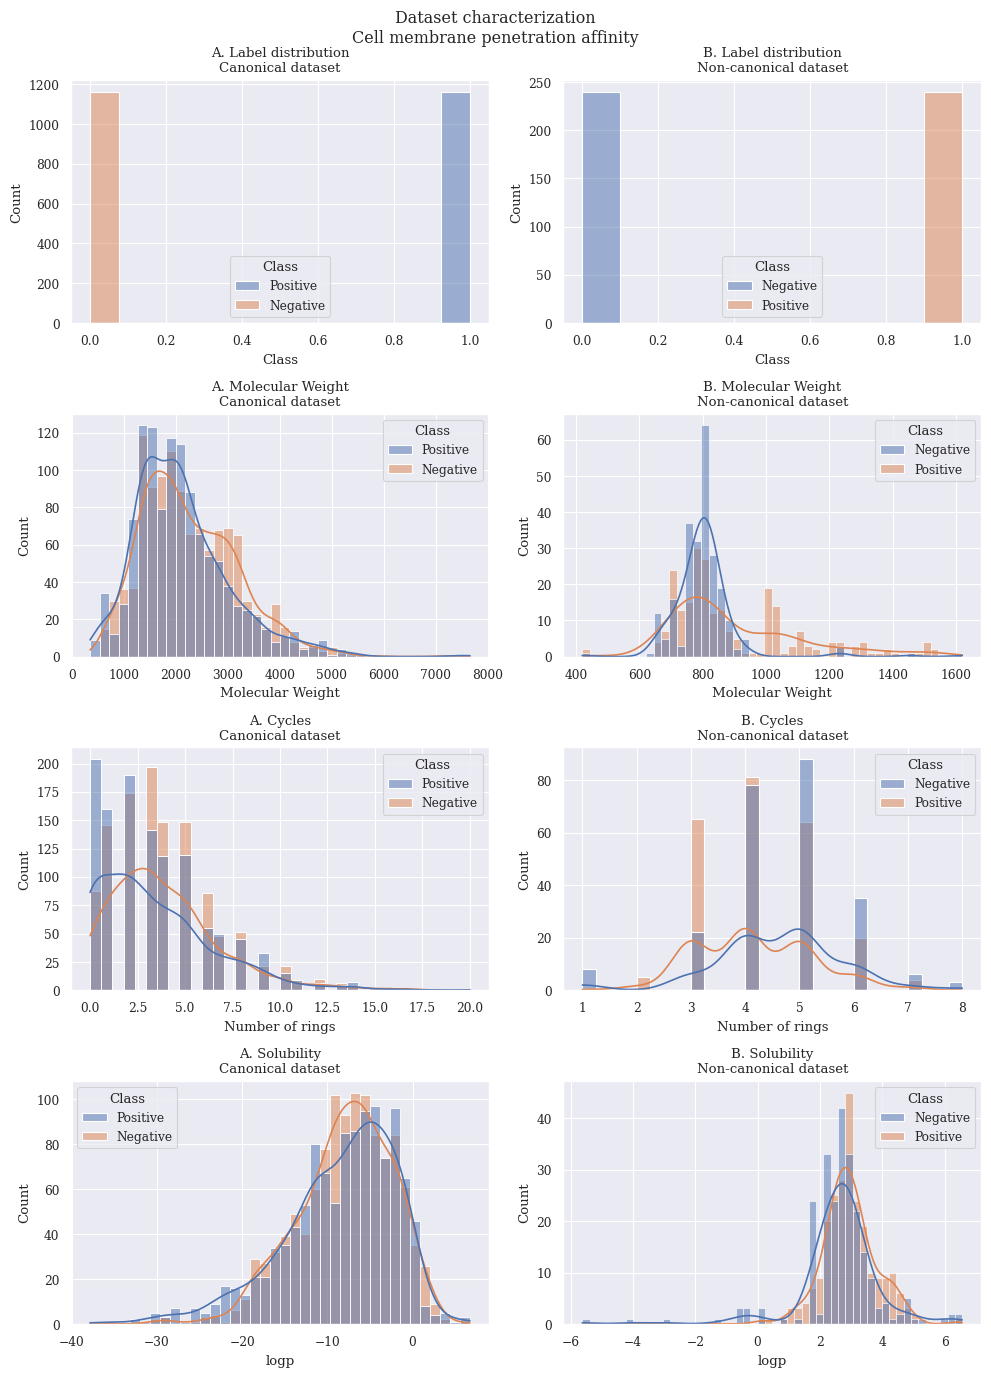

In [4]:
n_properties = 4

df = pd.read_csv('../../original_data/c-cpp.txt')
df2 = pd.read_csv('../../original_data/nc-cpp.csv')

df3 = pd.read_csv('../../downstream_data/c-cpp.csv')
df4 = pd.read_csv('../../downstream_data/nc-cpp.csv')

df3['wt'] = df3['SMILES'].map(get_mwt)
df4['wt'] = df4['SMILES'].map(get_mwt)
df3['rings'] = df3['SMILES'].map(get_rings)
df4['rings'] = df4['SMILES'].map(get_rings)
df3['logp'] = df3['SMILES'].map(get_logp)
df4['logp'] = df4['SMILES'].map(get_logp)
df3['Class'] = df3['labels'].map(lambda x: 'Positive' if x == 1 else 'Negative')
df4['Class'] = df4['labels'].map(lambda x: 'Positive' if x == 1 else 'Negative')

print(f"Canonical - Removed entries: {len(df) - len(df3)}")
print(f"Non-canonical - Removed entries: {len(df2) - len(df4)}")



plt.gcf().set_size_inches(5, 3.5)
sns.set_theme('paper')
plt.rcParams.update({'font.family': 'serif',
            })

sns.histplot(df2, x='PAMPA', kde=True)
plt.xlabel("PAMPA cell permeability")
plt.title("Original label distribution\nnon-canonical cell permeability")
plt.savefig('si_figures/nc-cpp-original.png', dpi=DPI, bbox_inches='tight')
plt.close()

plt.gcf().set_size_inches(10, 3.5*n_properties)
sns.set_theme('paper')
plt.rcParams.update({'font.family': 'serif',
            })
                    #  'mathtext.default': 'regular'})
plt.subplots_adjust(top=0.8)


plt.subplot(n_properties, 2, 1)
sns.histplot(df3, x='labels', kde=True, hue="Class")
plt.xlabel("Class")
plt.title("A. Label distribution\nCanonical dataset")

plt.subplot(n_properties, 2, 2)
sns.histplot(df4, x='labels', kde=True, hue="Class")
plt.xlabel("Class")
plt.title("B. Label distribution\nNon-canonical dataset")

plt.subplot(n_properties, 2, 3)
sns.histplot(df3, x='wt', kde=True, hue='Class')
plt.xlabel("Molecular Weight")
plt.title("A. Molecular Weight\nCanonical dataset")

plt.subplot(n_properties, 2, 4)
sns.histplot(df4, x='wt', kde=True, hue='Class')
plt.xlabel("Molecular Weight")
plt.title("B. Molecular Weight\nNon-canonical dataset")

plt.subplot(n_properties, 2, 5)
sns.histplot(df3, x='rings', kde=True, hue="Class")
plt.xlabel("Number of rings")
plt.title("A. Cycles\nCanonical dataset")

plt.subplot(n_properties, 2, 6)
sns.histplot(df4, x='rings', kde=True, hue="Class")
plt.xlabel("Number of rings")
plt.title("B. Cycles\nNon-canonical dataset")

plt.subplot(n_properties, 2, 7)
sns.histplot(df3, x='logp', kde=True, hue="Class")
plt.xlabel("logp")
plt.title("A. Solubility\nCanonical dataset")

plt.subplot(n_properties, 2, 8)
sns.histplot(df4, x='logp', kde=True, hue="Class")
plt.xlabel("logp")
plt.title("B. Solubility\nNon-canonical dataset")

plt.suptitle("Dataset characterization\nCell membrane penetration affinity")
plt.tight_layout()
plt.savefig('si_figures/cpp.png', dpi=DPI, bbox_inches='tight')

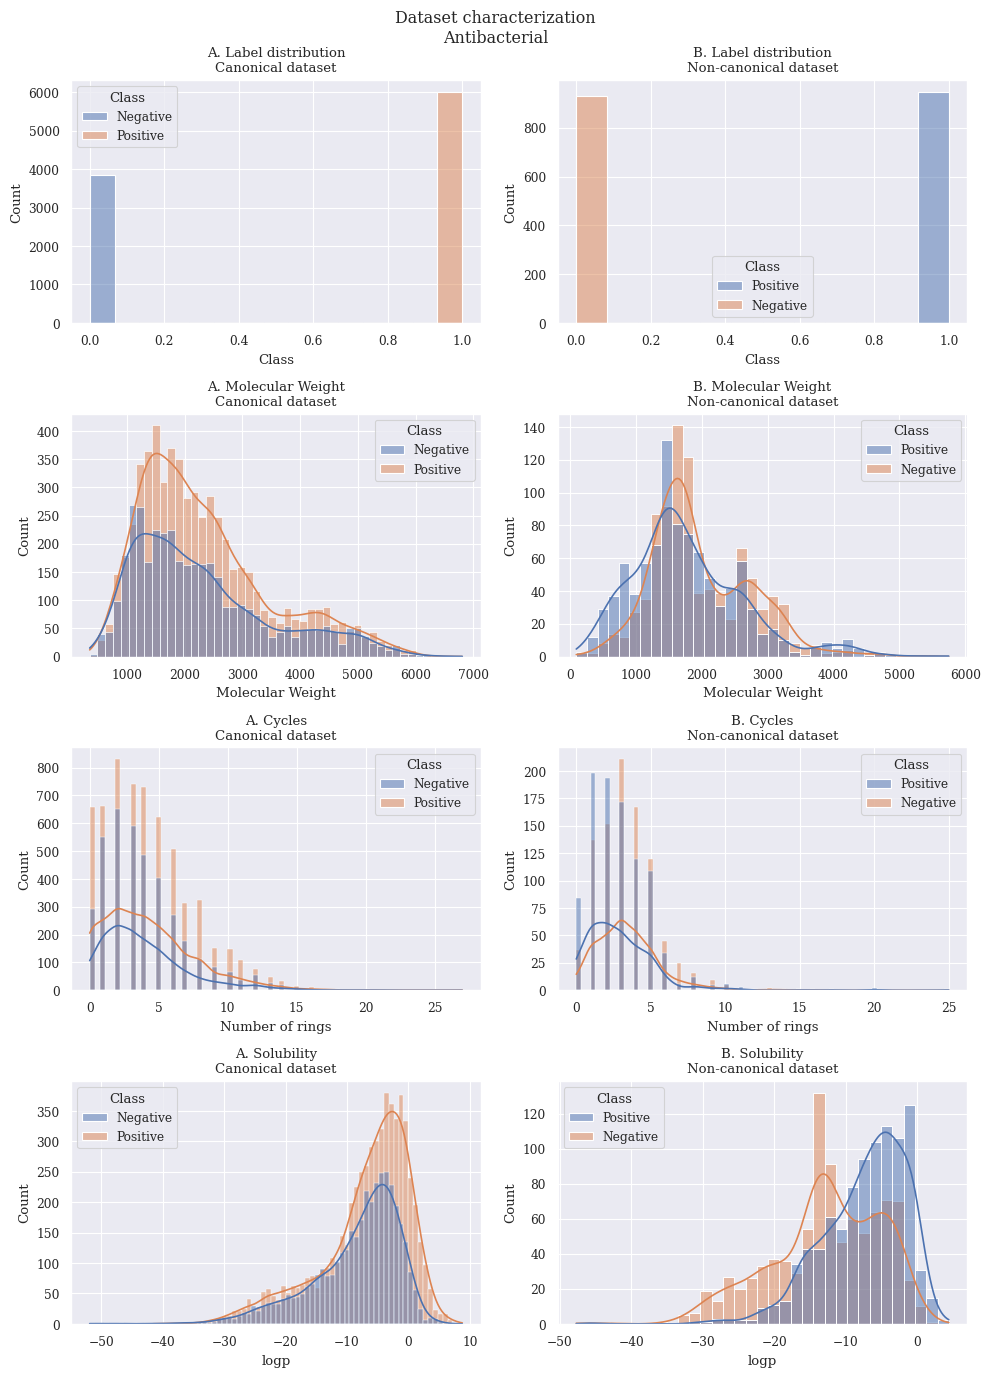

In [5]:
n_properties = 4


df3 = pd.read_csv('../../downstream_data/c-antibacterial.csv')
df4 = pd.read_csv('../../downstream_data/nc-antibacterial.csv')

df3['wt'] = df3['SMILES'].map(get_mwt)
df4['wt'] = df4['SMILES'].map(get_mwt)
df3['rings'] = df3['SMILES'].map(get_rings)
df4['rings'] = df4['SMILES'].map(get_rings)
df3['logp'] = df3['SMILES'].map(get_logp)
df4['logp'] = df4['SMILES'].map(get_logp)
df3['Class'] = df3['labels'].map(lambda x: 'Positive' if x == 1 else 'Negative')
df4['Class'] = df4['labels'].map(lambda x: 'Positive' if x == 1 else 'Negative')


plt.gcf().set_size_inches(10, 3.5*n_properties)
sns.set_theme('paper')
plt.rcParams.update({'font.family': 'serif',
            })
                    #  'mathtext.default': 'regular'})
plt.subplots_adjust(top=0.8)


plt.subplot(n_properties, 2, 1)
sns.histplot(df3, x='labels', kde=True, hue='Class')
plt.xlabel("Class")
plt.title("A. Label distribution\nCanonical dataset")

plt.subplot(n_properties, 2, 2)
sns.histplot(df4, x='labels', kde=True, hue="Class")
plt.xlabel("Class")
plt.title("B. Label distribution\nNon-canonical dataset")

plt.subplot(n_properties, 2, 3)
sns.histplot(df3, x='wt', kde=True, hue='Class')
plt.xlabel("Molecular Weight")
plt.title("A. Molecular Weight\nCanonical dataset")

plt.subplot(n_properties, 2, 4)
sns.histplot(df4, x='wt', kde=True, hue='Class')
plt.xlabel("Molecular Weight")
plt.title("B. Molecular Weight\nNon-canonical dataset")

plt.subplot(n_properties, 2, 5)
sns.histplot(df3, x='rings', kde=True, hue="Class")
plt.xlabel("Number of rings")
plt.title("A. Cycles\nCanonical dataset")

plt.subplot(n_properties, 2, 6)
sns.histplot(df4, x='rings', kde=True, hue="Class")
plt.xlabel("Number of rings")
plt.title("B. Cycles\nNon-canonical dataset")

plt.subplot(n_properties, 2, 7)
sns.histplot(df3, x='logp', kde=True, hue="Class")
plt.xlabel("logp")
plt.title("A. Solubility\nCanonical dataset")

plt.subplot(n_properties, 2, 8)
sns.histplot(df4, x='logp', kde=True, hue="Class")
plt.xlabel("logp")
plt.title("B. Solubility\nNon-canonical dataset")

plt.suptitle("Dataset characterization\nAntibacterial")
plt.tight_layout()
plt.savefig('si_figures/antibacterial.png', dpi=DPI, bbox_inches='tight')

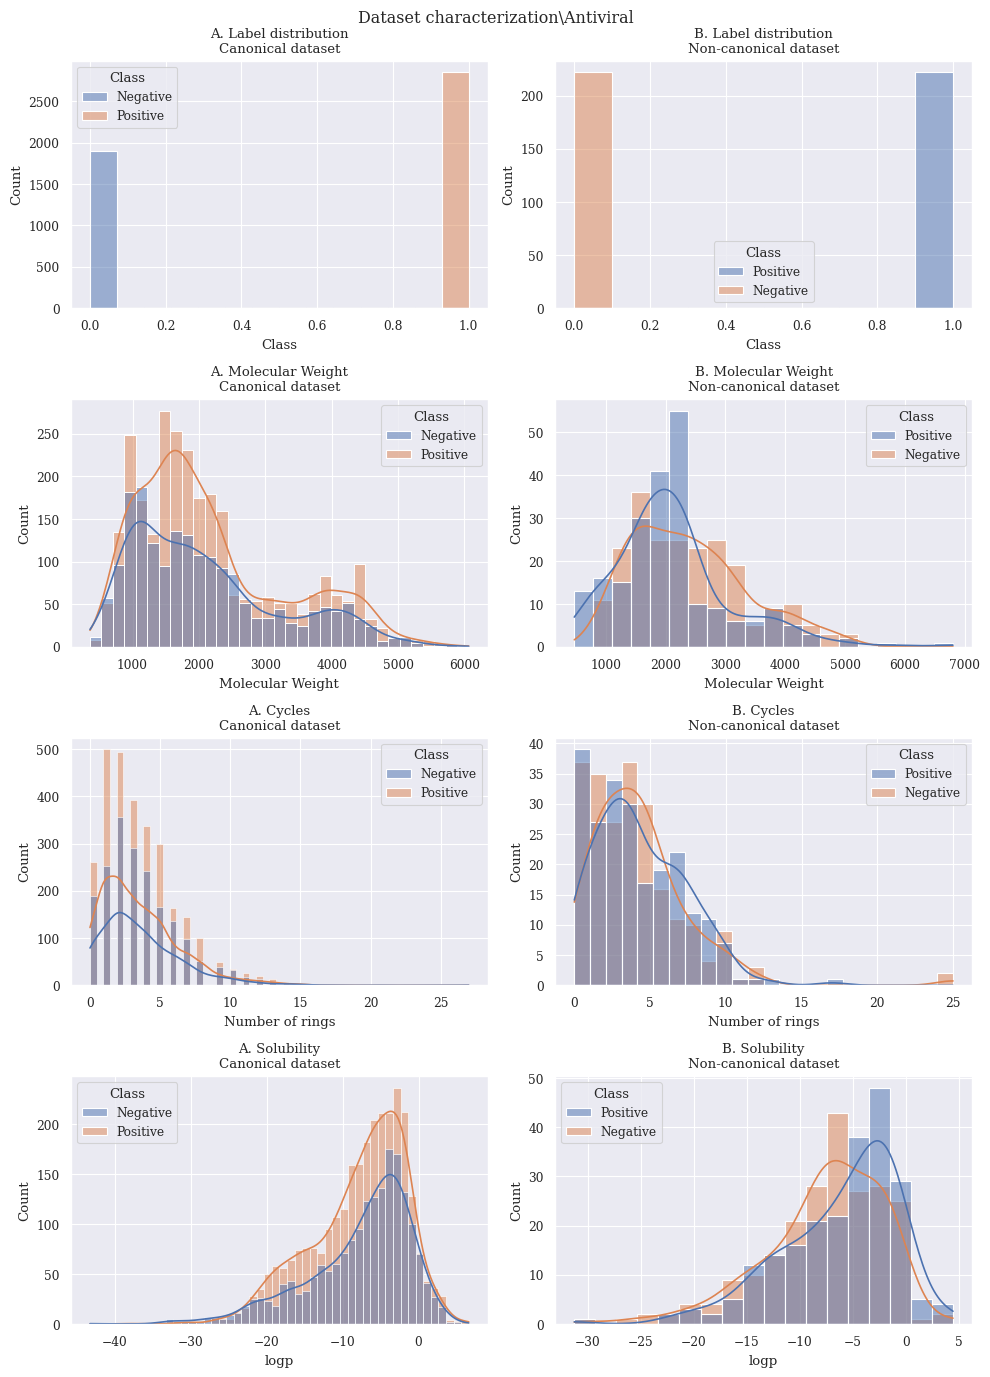

In [ ]:
n_properties = 4


df3 = pd.read_csv('../../downstream_data/c-antiviral.csv')
df4 = pd.read_csv('../../downstream_data/nc-antiviral.csv')

df3['wt'] = df3['SMILES'].map(get_mwt)
df4['wt'] = df4['SMILES'].map(get_mwt)
df3['rings'] = df3['SMILES'].map(get_rings)
df4['rings'] = df4['SMILES'].map(get_rings)
df3['logp'] = df3['SMILES'].map(get_logp)
df4['logp'] = df4['SMILES'].map(get_logp)
df3['Class'] = df3['labels'].map(lambda x: 'Positive' if x == 1 else 'Negative')
df4['Class'] = df4['labels'].map(lambda x: 'Positive' if x == 1 else 'Negative')


plt.gcf().set_size_inches(10, 3.5*n_properties)
sns.set_theme('paper')
plt.rcParams.update({'font.family': 'serif',
            })
                    #  'mathtext.default': 'regular'})
plt.subplots_adjust(top=0.8)


plt.subplot(n_properties, 2, 1)
sns.histplot(df3, x='labels', kde=True, hue='Class')
plt.xlabel("Class")
plt.title("A. Label distribution\nCanonical dataset")

plt.subplot(n_properties, 2, 2)
sns.histplot(df4, x='labels', kde=True, hue="Class")
plt.xlabel("Class")
plt.title("B. Label distribution\nNon-canonical dataset")

plt.subplot(n_properties, 2, 3)
sns.histplot(df3, x='wt', kde=True, hue='Class')
plt.xlabel("Molecular Weight")
plt.title("A. Molecular Weight\nCanonical dataset")

plt.subplot(n_properties, 2, 4)
sns.histplot(df4, x='wt', kde=True, hue='Class')
plt.xlabel("Molecular Weight")
plt.title("B. Molecular Weight\nNon-canonical dataset")

plt.subplot(n_properties, 2, 5)
sns.histplot(df3, x='rings', kde=True, hue="Class")
plt.xlabel("Number of rings")
plt.title("A. Cycles\nCanonical dataset")

plt.subplot(n_properties, 2, 6)
sns.histplot(df4, x='rings', kde=True, hue="Class")
plt.xlabel("Number of rings")
plt.title("B. Cycles\nNon-canonical dataset")

plt.subplot(n_properties, 2, 7)
sns.histplot(df3, x='logp', kde=True, hue="Class")
plt.xlabel("logp")
plt.title("A. Solubility\nCanonical dataset")

plt.subplot(n_properties, 2, 8)
sns.histplot(df4, x='logp', kde=True, hue="Class")
plt.xlabel("logp")
plt.title("B. Solubility\nNon-canonical dataset")

plt.suptitle("Dataset characterization\nAntiviral")
plt.tight_layout()
plt.savefig('si_figures/antiviral.png', dpi=DPI, bbox_inches='tight')